# Define the problem statement 

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [243]:
#import all the libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load Data into pandas data frame so that can check further

In [244]:
#inport the dataset 

train = pd.read_csv("train.csv")

test = pd.read_csv("titanictest.csv")

## Exploratory data analysis

In [245]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Data Dictionary**

In [247]:
train.shape

(891, 12)

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some missing values in **Age** and **Cabin**

In [249]:
print("Total number of missing values in age feature of training set are",
      train["Age"].isnull().sum(),"and for cabin is",train["Cabin"].isnull().sum(),
      "\nAnd only 2 values are missing in the Embarked feature")

Total number of missing values in age feature of training set are 177 and for cabin is 687 
And only 2 values are missing in the Embarked feature


## Visualization of the different feature with respect to survived

**Bar chart for catagorical Features**

In [250]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked =True,figsize=(10,5))

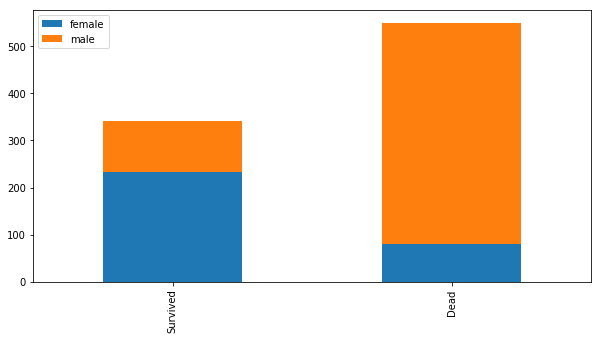

In [251]:
bar_chart("Sex")

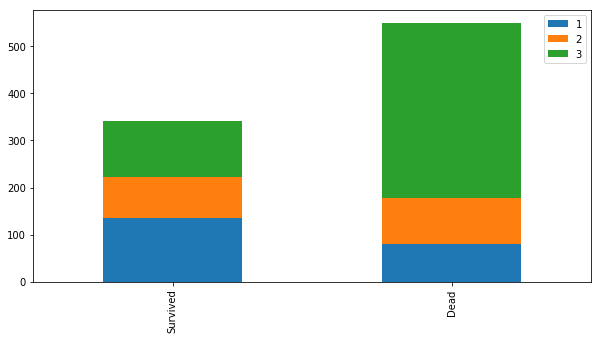

In [252]:
bar_chart("Pclass")

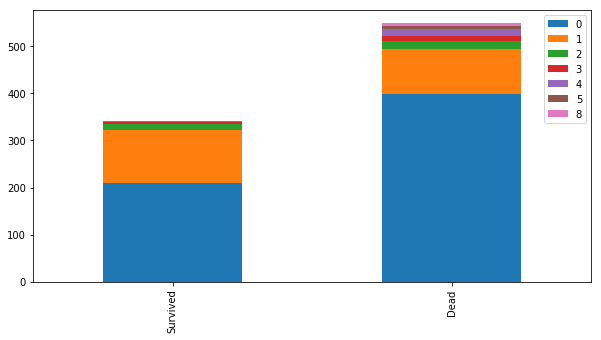

In [253]:
bar_chart("SibSp")

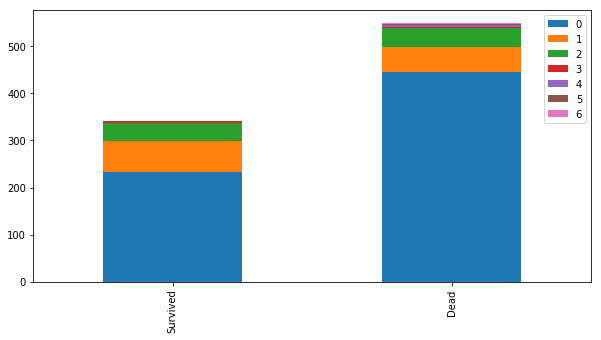

In [254]:
bar_chart("Parch")

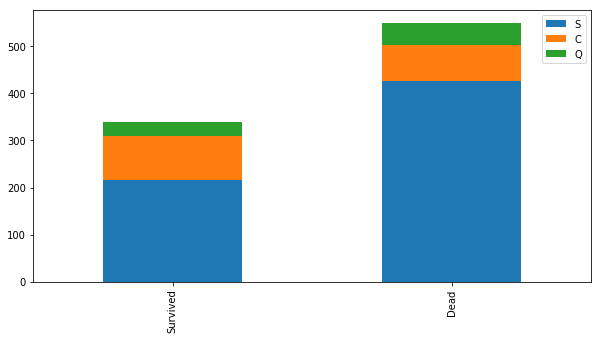

In [255]:
bar_chart("Embarked")

# Feature Engineering 

**Lets work on name and try to get some importent information out of it **

In [256]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [257]:
train_test_data = [train,test] #Combining the test and train and extract all the title from the name 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [258]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Capt          1
Sir           1
Mme           1
Ms            1
Lady          1
Countess      1
Don           1
Name: Title, dtype: int64

In [259]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

**Title map**

In [260]:
title_mapping = { "Mr":0,"Miss":1,"Mrs":2,
                 "Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,
                 "Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3
                }

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

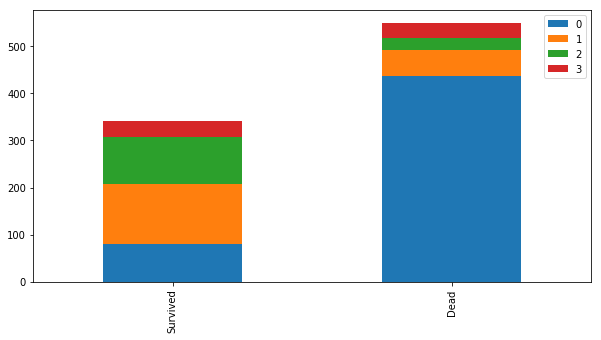

In [261]:
bar_chart("Title")

In [262]:
#Drop name column from test and train both

train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [263]:
#Lets map sex for test and and train

sex_mapping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [264]:
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2


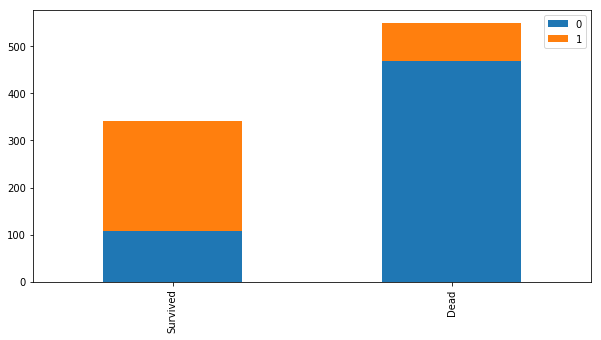

In [265]:
bar_chart("Sex")

**Age** do the missing value treatment

In [266]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [267]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB
None


In [268]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB
None


C:\Users\Gaurav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


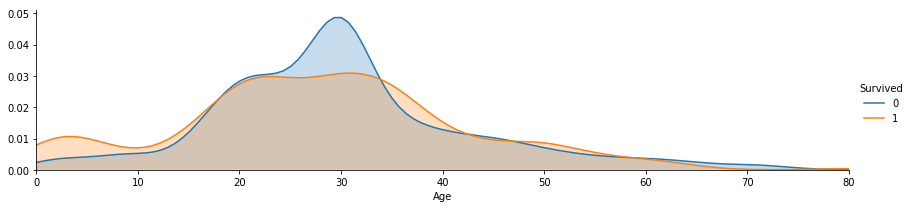

In [269]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.show()

In [270]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<=16,'Age']=0
    dataset.loc[(dataset["Age"]>16) & (dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset["Age"]>26) & (dataset['Age']<=36),'Age']=2
    dataset.loc[(dataset["Age"]>36) & (dataset['Age']<=62),'Age']=3
    dataset.loc[dataset["Age"]>62,'Age']=4

In [271]:
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2


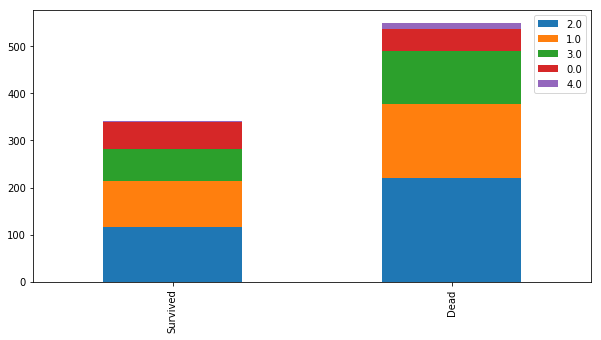

In [272]:
bar_chart("Age")

# Embarked 

**Filling missing value**

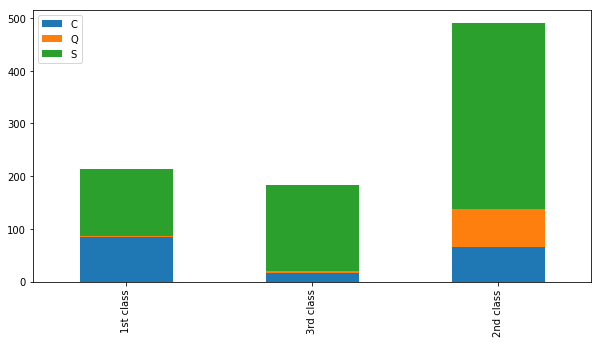

In [273]:
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = {"1st class",'2nd class','3rd class'}
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [274]:
#fill out missing embarked with S embark

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [276]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [277]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)

**Binning for fare**

In [278]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17,'Fare']=0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare']=1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2
    dataset.loc[dataset['Fare']>100,'Fare']=3

In [279]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1


**Cabin**

In [280]:
train["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
F2             3
D              3
F33            3
C123           2
D17            2
E8             2
D26            2
F4             2
E67            2
B77            2
C125           2
C126           2
E121           2
B28            2
D35            2
C92            2
B5             2
C78            2
D20            2
B35            2
B18            2
C68            2
C83            2
C65            2
B58 B60        2
              ..
D45            1
C54            1
A36            1
A7             1
C106           1
C85            1
D30            1
D6             1
C70            1
D19            1
B4             1
A23            1
C90            1
B3             1
B94            1
A20            1
E49            1
C91            1
B19            1
E63            1
E36            1
D9             1
E58            1
F38            1
E31            1
C95            1
E50            1
A6            

In [281]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset['Cabin'].str[:1]

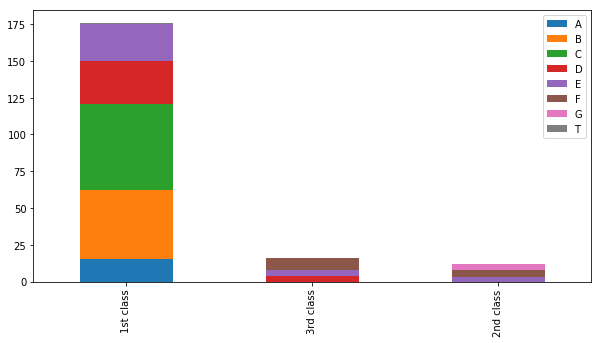

In [282]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = {"1st class",'2nd class','3rd class'}
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [283]:
cabin_mapping = {"A":0, "B":.4, "C":.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [284]:
#Missing value treatment for rows that are null
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [285]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

C:\Users\Gaurav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 11.0)

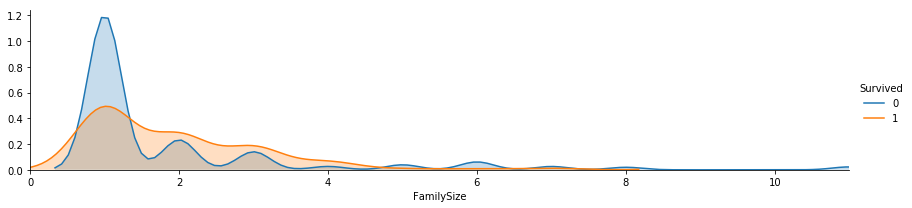

In [286]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [287]:
family_mapping = {1:0, 2:.4, 3:.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8 , 9:3.2, 10:3.6, 11:4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [288]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [289]:
feature_drop = ['Ticket','SibSp','Parch']
train = train.drop(feature_drop,axis=1)
test = test.drop(feature_drop,axis=1)

In [290]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0


In [291]:
train = train.drop(['PassengerId'],axis=1)

In [292]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [293]:
train_data = train.drop('Survived',axis = 1)

target = train['Survived']

train_data.shape,target.shape

((891, 8), (891,))

# Modelling

In [294]:
#Import Classifier Modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [295]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


**K Fold cross validation (K-Fold)**

In [296]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

**KNN**

In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [298]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [299]:
score.mean()

0.8260424469413232

**Decision Tree**

In [300]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.87640449 0.7752809
 0.82022472 0.82022472 0.74157303 0.79775281]


In [301]:
score.mean()

0.7968913857677904

**Random Forest **

In [302]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.83146067 0.80898876 0.80898876 0.91011236 0.82022472
 0.83146067 0.82022472 0.75280899 0.82022472]


In [303]:
score.mean()

0.8171161048689137

**Naive Bayes**

In [304]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [305]:
score.mean()

0.7878027465667914

**SVM**

In [306]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [307]:
score.mean()

0.8350187265917602

# Testing


In [308]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [314]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
FamilySize    418 non-null float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [315]:
test_data = test.drop("PassengerId",axis=1).copy()

In [316]:
clf = SVC()
clf.fit(train_data,target)
prediction = clf.predict(test_data)

In [317]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":prediction})

submission.to_csv('TitanicIteration3.csv',index=False)